# Playing *gomoku* (five-in-a-row, luffarschack)

This notebook is for interactive play against the strategy from the 'Learn gomoku' notebook.

Run the cell below to play against the best strategy so far. 


<IPython.core.display.Javascript object>


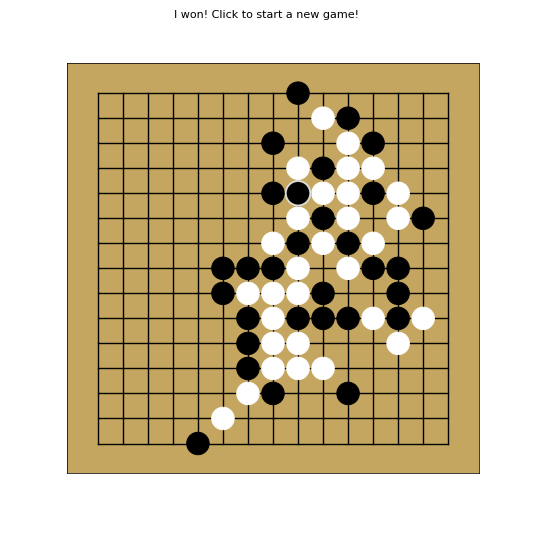

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import gameplay as gp

gp.board_size = 15 # The board is 15x15
gp.seq_to_win = 5  # how many marks in a row counts as a win

class GamePlayer:
    def __init__(self, model):
        self.model = model
        self.gomoku_style = True
        fig, ax = plt.subplots()
        fig.set_size_inches(8,8)
        self.axes = ax
        self.cid = ax.figure.canvas.mpl_connect('button_press_event', self)
        ax.set_axis_off()
        self.start_new_game()
        
    def start_new_game(self):
        self.board = np.array(np.zeros((1, gp.board_size, gp.board_size, 2)))
        self.game_over = False
        self.axes.clear()
        if np.random.rand() < 0.5:  # I get to start :-)
            self.make_a_move()
        gp.plot_board(self.board, None, gomoku_style=True) #, self.axes)
        self.axes.figure.suptitle("Click to play")
        plt.show()
        
    def make_a_move(self):
        self.board, _, reward, self.game_over, move = gp.make_player_move(self.board, player=0, exploration_rate=0.0, max_factor=1000.0, model=self.model)
        return reward, move
        
    def __call__(self, event):
        # print('click', event)
        if event.inaxes!=self.axes: return
        if self.game_over:  # start a new game
            self.start_new_game()
            return
        
        if self.gomoku_style:
            row = min([int(event.ydata+0.5), gp.board_size-1])
            col = min([int(event.xdata+0.5), gp.board_size-1])
        else:
            row = min([int(event.ydata), gp.board_size-1])
            col = min([int(event.xdata), gp.board_size-1])

        if self.board[0,row,col,0] == 0 and self.board[0,row,col,1] == 0:
            self.board[0,row,col,1] = 1
            self.game_over, reward = gp.check_game_over(self.board, 1, np.array([[row,col]]))
            if self.game_over:
                if reward==-1:
                    self.axes.figure.suptitle("You won! Click to start a new game!")
                else:
                    self.axes.figure.suptitle("It's a tie! Click to start a new game!")
                move = None
                    
            else:
                reward, move = self.make_a_move()
                if self.game_over:
                    if reward==1:
                        self.axes.figure.suptitle("I won! Click to start a new game!")
                    else:
                        self.axes.figure.suptitle("It's a tie! Click to start a new game!")
                
            gp.plot_board(self.board, move, gomoku_style=True) #, self.axes)
            plt.show()
            #self.axes.figure.canvas.draw()


model=keras.models.load_model('B15_1_4700.h5')

gplayer = GamePlayer(model)